# Assignment 2   -- Group 14

In [41]:
import pandas as pd
import statsmodels.api as sm
import math 
import statistics as st
import numpy as np

## Preprocess data

In [27]:
return_df = pd.read_excel("/Users/wuyating/Desktop/big data/Returns_Clean.xlsx")
flow_df = pd.read_excel("/Users/wuyating/Desktop/big data/Flows_Clean.xlsx")

In [28]:
flow_df.head()

,Dates,50286,91804,10401,58501,60097,10363,41726,25080,30402,...,65365,27748,19350,75823,22840,17750,64557,50278,15553,88832
0,19930401,1.083253,-5.699942,1.194241,4.837066,-8.423100,-1.305991,1.299232,-0.467033,0.000000,...,0.416478,0.904076,3.731669,-0.774561,-0.257508,3.162328,-0.047864,0.623058,0.329819,0.232555
1,19930402,1.420868,8.951401,-1.106500,4.365623,-11.960179,1.261436,0.145421,0.625825,-2.529088,...,7.658829,0.394204,4.965978,-1.697999,-5.026532,-5.289657,2.423657,-10.043329,4.213098,-0.854005
2,19930405,-1.720117,-5.216893,-1.388985,0.516303,-16.809023,0.610771,-3.277465,0.595360,1.170176,...,0.340133,-1.597132,0.226364,-1.705865,-3.205529,-1.523400,0.293756,-1.155403,-0.594859,1.080668
3,19930406,-19.184283,-0.998393,0.645662,3.255778,-16.809023,1.372598,-0.205378,0.373627,0.531704,...,2.533133,-1.129123,-0.336779,-2.188710,-2.068314,2.333132,-1.148651,2.912813,0.501317,0.360467
4,19930407,-1.772440,-8.526801,2.737920,6.905926,-14.449892,0.101245,24.657138,0.046703,0.558868,...,-0.114119,-1.221991,6.340711,-0.011839,-6.358787,-2.466997,-0.485223,1.524124,0.556544,0.623206


In [29]:
return_df.columns = return_df.columns.astype(str)
flow_df.columns = flow_df.columns.astype(str)
tickers = return_df.columns[1:]
return_df.columns = ["Dates"] + [i+" return" for i in return_df.columns[1:]]
flow_df.columns = ["Dates"] + [i+" flow" for i in flow_df.columns[1:]]

In [30]:
print(return_df.columns)
print(flow_df.columns)

Index(['Dates', '50286 return', '91804 return', '10401 return', '58501 return',
       '60097 return', '10363 return', '41726 return', '25080 return',
       '30402 return',
       ...
       '65365 return', '27748 return', '19350 return', '75823 return',
       '22840 return', '17750 return', '64557 return', '50278 return',
       '15553 return', '88832 return'],
      dtype='object', length=101)
Index(['Dates', '50286 flow', '91804 flow', '10401 flow', '58501 flow',
       '60097 flow', '10363 flow', '41726 flow', '25080 flow', '30402 flow',
       ...
       '65365 flow', '27748 flow', '19350 flow', '75823 flow', '22840 flow',
       '17750 flow', '64557 flow', '50278 flow', '15553 flow', '88832 flow'],
      dtype='object', length=101)


In [31]:
df = pd.merge(return_df,flow_df)
df.head()

,Dates,50286 return,91804 return,10401 return,58501 return,60097 return,10363 return,41726 return,25080 return,30402 return,...,65365 flow,27748 flow,19350 flow,75823 flow,22840 flow,17750 flow,64557 flow,50278 flow,15553 flow,88832 flow
0,19930401,0.004219,0.000000,0.004405,-0.041667,-0.052980,-0.010000,0.007092,0.000000,-0.009709,...,0.416478,0.904076,3.731669,-0.774561,-0.257508,3.162328,-0.047864,0.623058,0.329819,0.232555
1,19930402,-0.021008,-0.093023,-0.006579,0.021739,-0.050490,-0.050505,0.000000,0.100000,0.000000,...,7.658829,0.394204,4.965978,-1.697999,-5.026532,-5.289657,2.423657,-10.043329,4.213098,-0.854005
2,19930405,0.021459,0.025641,-0.008830,0.000000,-0.022140,-0.021277,-0.007042,-0.181818,-0.019608,...,0.340133,-1.597132,0.226364,-1.705865,-3.205529,-1.523400,0.293756,-1.155403,-0.594859,1.080668
3,19930406,-0.021008,-0.025000,0.022272,-0.042553,-0.052830,-0.021739,0.000000,0.111111,-0.010000,...,2.533133,-1.129123,-0.336779,-2.188710,-2.068314,2.333132,-1.148651,2.912813,0.501317,0.360467
4,19930407,0.008584,-0.025641,0.010893,0.000000,-0.043825,0.011111,0.000000,-0.100000,0.010101,...,-0.114119,-1.221991,6.340711,-0.011839,-6.358787,-2.466997,-0.485223,1.524124,0.556544,0.623206


## Linear Regression

In [43]:
def ols(ticker, window):
    l1ri = df[ticker+" return"].shift(1).dropna()[2:]
    l2ri = df[ticker+" return"].shift(2).dropna()[1:]
    l3ri = df[ticker+" return"].shift(3).dropna()
    l1fi = df[ticker+" flow"].shift(1).dropna()[2:]
    l2fi = df[ticker+" flow"].shift(2).dropna()[1:]
    l3fi = df[ticker+" flow"].shift(3).dropna()
    y = df[ticker+" return"][3:]
    X = pd.DataFrame({"l1":l1ri,"l2":l2ri,"l3":l3ri,"l1f":l1fi,"l2f":l2fi,"l3f":l3fi})
    size = len(y)
    pred = []
    se = []
    test=[]
    # Rolling windows
    for i in range(size-window-1):
        train_y = y[i:i+window+1]
        test_y = y[i+window+1:i+window+2].values[0]
        train_X = X[i:i+window+1]
        test_X = X[i+window+1:i+window+2]
        model = sm.OLS(train_y,train_X)
        res = model.fit()
        predi = res.predict(test_X).values[0]
        sei = (test_y-predi)**2
        pred.append(predi)
        se.append(sei)
        test.append(test_y)
    r_squared = 1-(sum(se)/(st.variance(test)*len(test)))
    rmse = math.sqrt(sum(se)/len(se))
    return rmse, pred, r_squared



In [44]:
print(ols("50286", 50)[2])

-0.1563730938989225


## Historical Mean

In [54]:
def hm(ticker, window):
    pred = df[ticker + " return"].rolling(window).mean()[window+4:].values
    real = df[ticker + " return"][window+4:].values 
    se = (pred-real)**2
    rmse = math.sqrt(sum(se)/len(se))
    r_squared = 1-(sum(se)/(st.variance(real)*len(real)))
    return rmse, pred, r_squared
    

In [56]:
print(ols("50286", 200)[2])
print("----")
print(hm("50286", 200)[2])

-0.019423130697571178
----
0.005189500749988918


## Plot cumulative RMSE for OLS with different window size

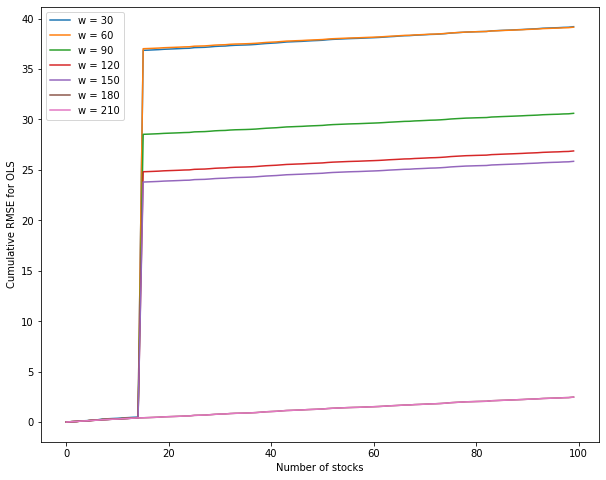

In [38]:
from tqdm.notebook import tqdm
fig, ax = plt.subplots(figsize=(10,8))
for i in tqdm([30,60,90,120,150,180,210]):
    cum_rmse1=[]
    crmse1=0
    for ticker in tickers:
        crmse1+=ols(ticker, i)[0]
        cum_rmse1.append(crmse1) 
    ax.plot(range(len(tickers)), cum_rmse1, label="w = "+str(i))
ax.legend(loc = 'best')
ax.set_ylabel('Cumulative RMSE for OLS')
ax.set_xlabel('Number of stocks')
plt.show()

## Plot cumulative RMSE for historical means with different window size

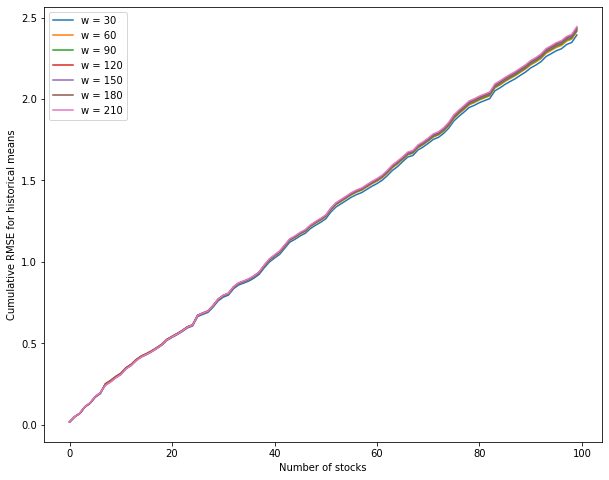

In [57]:
from tqdm.notebook import tqdm
fig, ax = plt.subplots(figsize=(10,8))
for i in tqdm([30,60,90,120,150,180,210]):
    cum_rmse2=[]
    crmse2=0
    for ticker in tickers:
        crmse2+=hm(ticker, i)[0]
        cum_rmse2.append(crmse2) 
    ax.plot(range(len(tickers)), cum_rmse2, label="w = "+str(i))
ax.legend(loc = 'best')
ax.set_ylabel('Cumulative RMSE for historical means')
ax.set_xlabel('Number of stocks')
plt.show()

## Choose window size = 210 :

In [58]:
from tqdm.notebook import tqdm
cum_rmse1=[]
cum_rmse2=[]
crmse1=0
crmse2=0
for ticker in tqdm(tickers):
    crmse1+=ols(ticker,210)[0]
    cum_rmse1.append(crmse1) 
    crmse2+=hm(ticker,210)[0]
    cum_rmse2.append(crmse2) 

## Plot cumulative RMSE differential

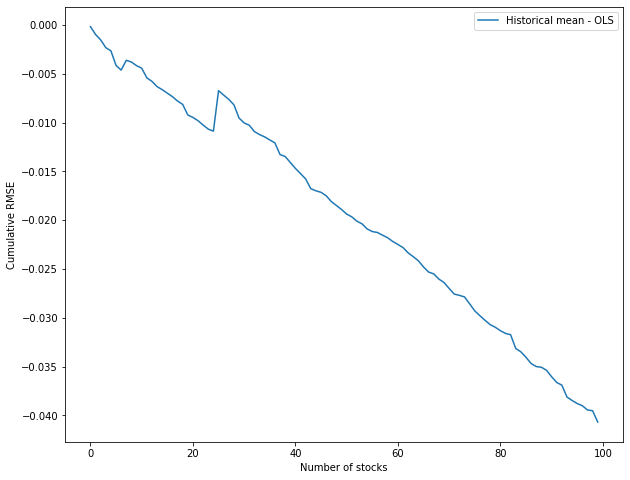

In [59]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(range(len(tickers)), np.subtract(cum_rmse2, cum_rmse1), label="Historical mean - OLS")
ax.legend(loc = 'best')
ax.set_ylabel('Cumulative RMSE')
ax.set_xlabel('Number of stocks')
plt.show()

## Out of sample R-squared

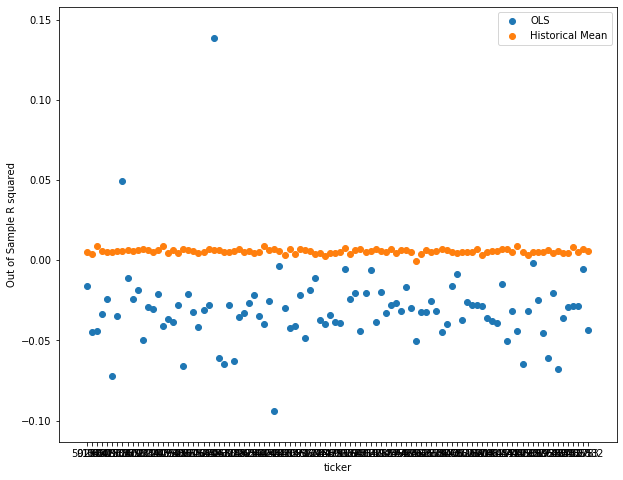

In [67]:
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(tickers,[ols(ticker, 210)[2] for ticker in tickers], label = "OLS")
ax.scatter(tickers,[hm(ticker, 210)[2] for ticker in tickers], label = "Historical Mean")
ax.set_ylabel('Out of Sample R squared')
ax.set_xlabel('ticker')
ax.legend(loc = 'best')
plt.show()